In [10]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
path_dir = 'names'
columns = ['Name', 'Sex', 'Count']

In [28]:
years = input('Введите года начала и конца периода: ')
years_lst = years.split(', ')
year_start, year_stop = list(years_lst)


Введите года начала и конца периода: 1900, 2000


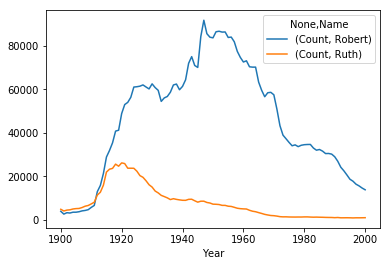

In [30]:
years_list = list(i for i in range(int(year_start), int(year_stop) + 1, 1))
names_year = dict()
for f in years_list:
    names_year[f] = pd.read_csv(os.path.join(path_dir, 'yob{}.txt'.format(f)), names = columns)
fr1 = pd.concat(names_year, names = ['Year', 'Pos'])
names_fr1 = fr1.groupby([fr1.index.get_level_values(0), 'Name']).sum()
names_fr1.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()


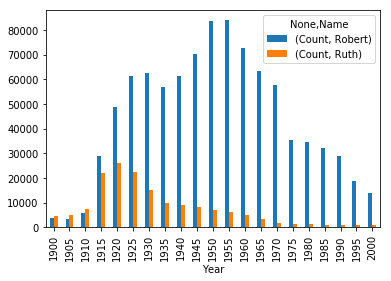

In [31]:
years_new_list = list(i for i in range(int(year_start), int(year_stop) + 1, 5))
names_year_gist = dict()
for f in years_new_list:
    names_year_gist[f] = pd.read_csv(os.path.join(path_dir, 'yob{}.txt'.format(f)), names = columns)
fr2 = pd.concat(names_year_gist, names = ['Year', 'Pos'])
names_fr2 = fr2.groupby([fr2.index.get_level_values(0), 'Name']).sum()
names_fr2.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()


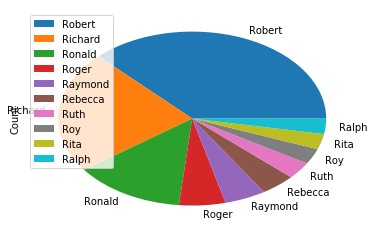

In [54]:
file_name = '1950'
top10 = pd.read_csv(os.path.join(path_dir, 'yob{}.txt'.format(file_name)), names = columns)
top10_fr = top10[top10.Name.str.match('R\w')]
top10_fr.groupby('Name').sum().sort_values(by = 'Count', ascending = False).head(10).plot.pie(y = 'Count')


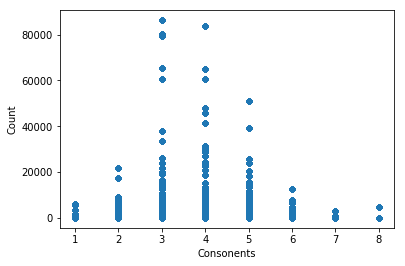

In [63]:
cons = set("bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ")
years_list = list(i for i in range(int(year_start), int(year_stop) + 1, 1))
names_list = list(pd.read_csv(os.path.join(path_dir, 'yob{}.txt'.format(file_name)), names = columns) for f in years_list)
dfr = pd.concat(names_list)
dfr.groupby('Name').sum()
dfr['Consonents'] = [sum(1 for c in x if c in cons) for x in dfr['Name']]
dfr.plot.scatter(x = 'Consonents', y = 'Count')